# Video: Visualizing Bandit Beliefs with Beta Distributions

Beta distributions give a convenient way to reason about Bernoulli probability distributions using Bayesian analysis.
This video will show how the distributions change as more data or evidence is acquired, and show both the evolving estimates of the average and shrinking bounds on the likely true parameter of the distribution.

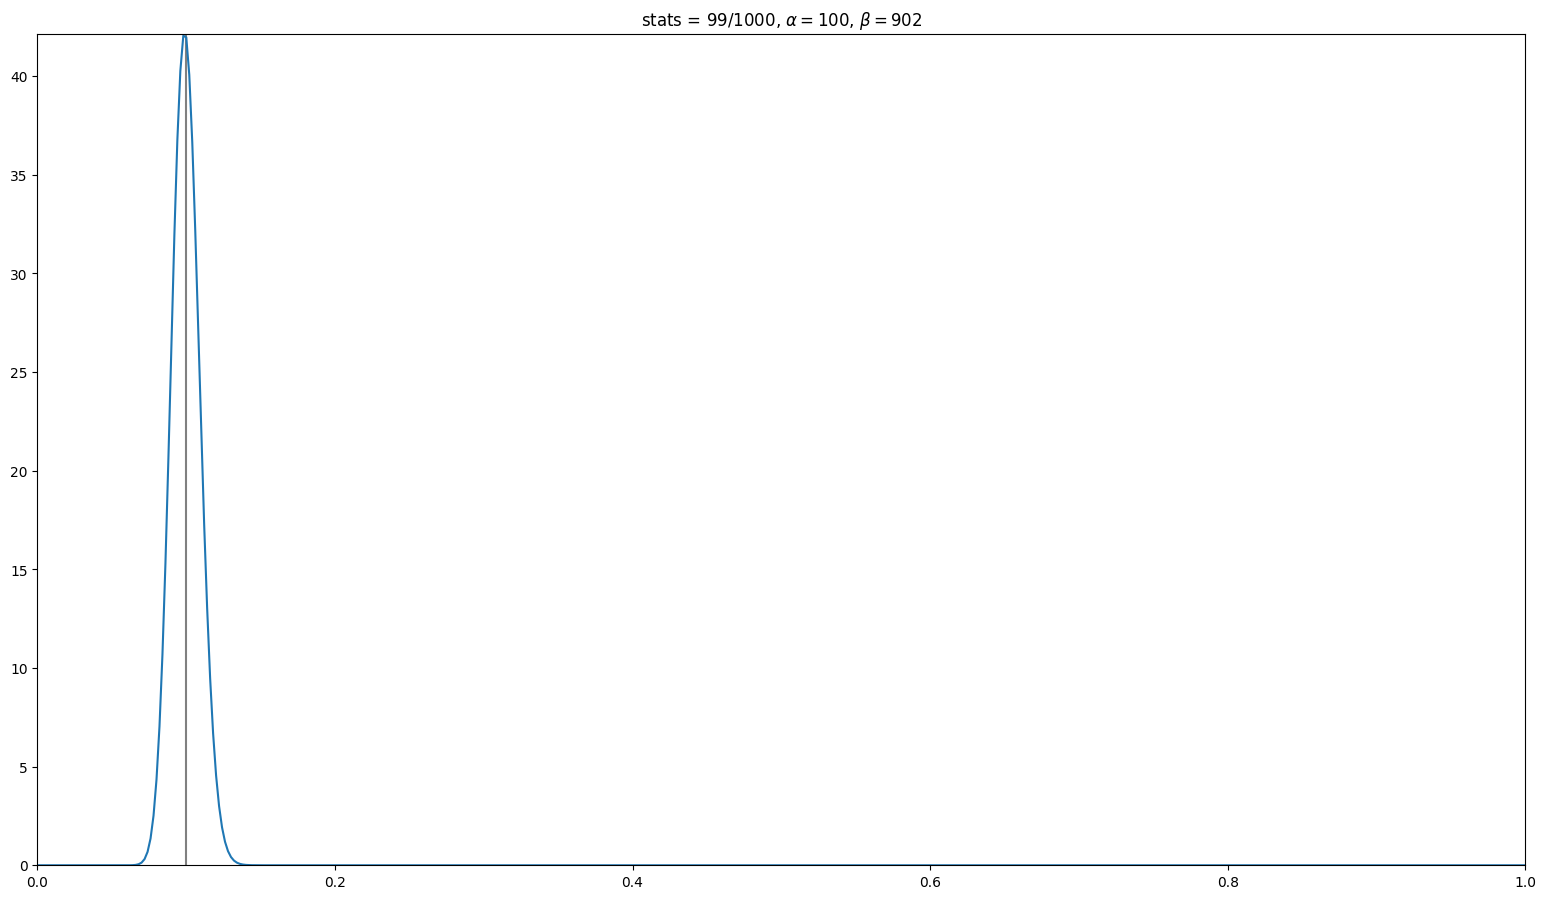

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.stats
from IPython.display import HTML

# true probability of reward 1

p = 0.1

# setup Matplotlib figure and plot a single line.
# we will replace the data for this line after each Bayesian update.

fig = plt.figure(figsize=(19.2, 10.8), dpi=100)
ax = plt.axes(xlim=(0,1))
plt.axvline(x=p, color="grey")
line, = ax.plot([], [])

np.random.seed(704)
samples = np.random.uniform(0, 1, 1000) < p

def init():
    return line,

def animate(i):
    successes = sum(samples[:i])
    alpha = 1 + successes
    beta = 1 + i - successes

    x = np.linspace(0, 2, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)
    line.set_data(x, y)
    ax.set_ylim(0, y.max()+0.1)

    ax.set_title(f"stats = ${successes}/{i}$, $\\alpha={alpha}$, $\\beta={beta}$")

    return line,

anim = FuncAnimation(fig, func=animate, init_func=init, frames=1001, interval=200)

# extra args to enable HTML embedding
anim.save("beta.mp4", fps=30, extra_args=['-vcodec', 'libx264']);

Script:
* Before I show you the process running, I'll point out a few points in the code.
* First, I'm using the animation module in Matplotlib to show how the beta distributions change.
* There is some basic setup of the plotting data structures.
* Usually we do not save them, but we will be reusing them for each update.
* This line variable in particular will be changed to update the distribution.
* The real work is in this animate function.
* It computes a new beta distribution based on the samples so far, and will be used to build the animation.
* I ran it ahead of time since it is a little slow to animate a thousand frames at once.
* Let's look at the results now.

In [ ]:
HTML(anim.to_html5_video())

Script:
* Before I start, I'll point out a few details.
* I'm using the beta distribution with $\alpha=1$ and $\beta=1$ which is the uniform distribution between 0 and 1.
* The blue line is the pdf of the current posterior probability distribution.
* The grey vertical line marks the true probability, 10%, so you compare where the mass of the probability distribution is compared to the true probability.
* Each time the action is taken, it samples a zero or one reward and updates the statistics, and updates the beta distribution with new parameters.
* Let's see that now.

Script:
* Since the probability of a zero reward is 90%, we expect the first few sample rewards to be zeros, and the probablity distribution will be concentrated around zero.
* But once both a zero and one have been sampled, we will see a more typical beta distribution with zero density at zero and one and a peak similar to the average.
* Since most of the samples are zeroes, most of the updates will shift the distribution a bit towards lower values.
* However, when a one is sampled, you will notice a jump up in the distribution.
* Let's just watch for a few seconds.

Script:
* What did you notice?
* The distribution is moving back and forth, generally in the neighborhood of the true probability.
* Common zero samples make small distribution shifts to lower values.
* Less common one samples make bigger distribution shifts to higher value.
* If you look at the stats up top, they rarely have exactly 10% as the average.
* That is expected of course, because these are random samples.
* But we do expect them to usually be close.
* If you watch longer, you will notice that the distribution is getting more narrow over time, reflecting increased certainty from more data.

Script: (faculty on camera)
* Beta distributions give a nice intuitive way to understand Bernoulli distributions as data becomes available.
* Beta distributions do not work for all distributions, but you can imagine similar analysis being done with other distributions.
* The bandit algorithms that you will learn will take advantage of these intuitions to explore and exploit the rewards of each arm.


https://github.com/bu-cds-omds/dx704-examples/blob/main/week03/video_visualizing_bandit_beliefs_with_beta_distributions.ipynb